In [156]:
# %matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from __wise__ import *
from __legpars__ import *

In [157]:
#inputting database
path = r'E:/databases/Merged.csv'
usecols = ['CATAID_1', 'BPT', 'WHAN', 'W1_flux', 'W1_fluxerr', 'W2_flux', 'W2_fluxerr', 'W3_flux', 'W3_fluxerr']
MainDataFrame = pd.read_csv(path, usecols=usecols)

#https://iopscience.iop.org/article/10.3847/1538-4365/aaa00a
#https://www.aanda.org/articles/aa/full_html/2023/11/aa47016-23/aa47016-23.html
#https://academic.oup.com/mnras/article/462/2/1826/2589693 -- !!!!!!!!!!

print(MainDataFrame.shape)
# MainDataFrame.to_csv(r'E:/databases/WISE.csv', index=False)

(1995, 9)


In [158]:
db = MainDataFrame
db1 = db.query('W1_flux > 0 & W2_flux > 0 & W3_flux > 0')
db_det = db.query('W1_flux > 2*W1_fluxerr & W2_flux > 2*W2_fluxerr & W3_flux > 2*W3_fluxerr')

db_w1 = db.query('W1_flux < 2*W1_fluxerr & W2_flux > 2*W2_fluxerr & W3_flux > 2*W3_fluxerr')
db_w1['W1_flux'] = db_w1['W1_flux'] + 2*db_w1['W1_fluxerr']
print(db_w1.shape)

db_w2 = db.query('W1_flux > 2*W1_fluxerr & W2_flux < 2*W2_fluxerr & W3_flux > 2*W3_fluxerr')
db_w2['W2_flux'] = db_w2['W2_flux'] + 2*db_w2['W2_fluxerr']
print(db_w2.shape)

db_w3 = db.query('W1_flux > 2*W1_fluxerr & W2_flux > 2*W2_fluxerr & W3_flux < 2*W3_fluxerr')
db_w3['W3_flux'] = db_w3['W3_flux'] + 2*db_w3['W3_fluxerr']
print(db_w3.shape)

db_w1_w3 = db.query('W1_flux < 2*W1_fluxerr & W2_flux > 2*W2_fluxerr & W3_flux < 2*W3_fluxerr')
db_w1_w3['W1_flux'] = db_w1_w3['W1_flux'] + 2*db_w1_w3['W1_fluxerr']
db_w1_w3['W3_flux'] = db_w1_w3['W3_flux'] + 2*db_w1_w3['W3_fluxerr']
print(db_w1_w3.shape)

db_nda = db.query('W2_flux < 2*W2_fluxerr & W1_flux < 2*W1_fluxerr & W3_flux < 2*W3_fluxerr')
print(db_nda.shape)

(10, 9)
(19, 9)
(401, 9)
(5, 9)
(77, 9)


C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_16364\3801079283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_w1['W1_flux'] = db_w1['W1_flux'] + 2*db_w1['W1_fluxerr']
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_16364\3801079283.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_w2['W2_flux'] = db_w2['W2_flux'] + 2*db_w2['W2_fluxerr']
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_16364\3801079283.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [159]:
databases = [db_w1, db_w2, db_w3, db_w1_w3, db_det]

for data in databases:
    data.insert(3, 'w3', flux_to_mag(data['W3_flux'], 30.988))
    data.insert(3, 'w2', flux_to_mag(data['W2_flux'], 171.641))
    data.insert(3, 'w1', flux_to_mag(data['W1_flux'], 309.124))
# db_det.to_csv(r'E:/databases/WISE.csv', index=False)

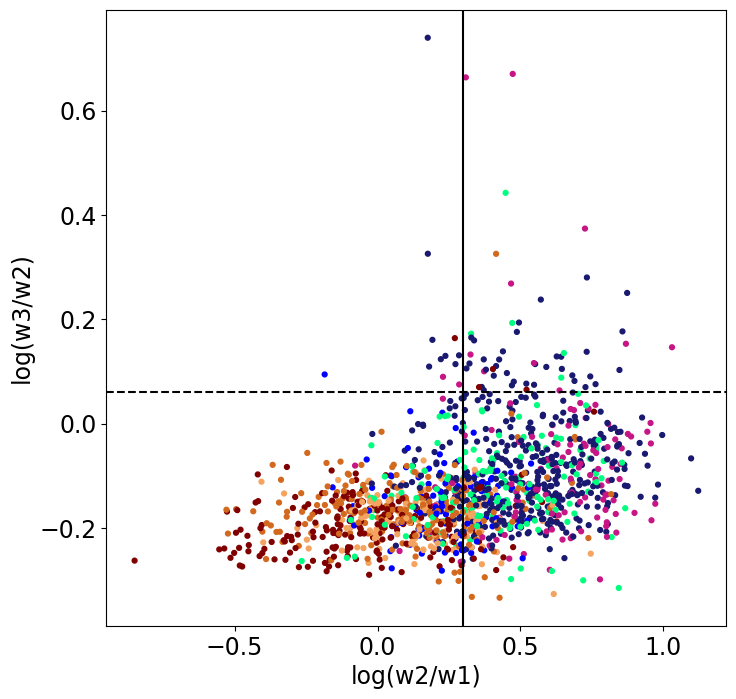

In [160]:
fig = plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 17
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17 

plt.scatter(np.log10(db_det['W3_flux']/db_det['W2_flux']),np.log10(db_det['W2_flux']/db_det['W1_flux']), c=[colors_WHAN[item] for item in db_det['WHAN']], marker='o', s=12)
# plt.scatter(db_det['w2_w3'], db_det['w1_w2'], c=[colors_BPT[item] for item in db_det['BPT']], marker='o', s=12)

plt.xlabel('log(w2/w1)')
plt.axhline(0.06, color='black', linestyle='dashed')

plt.ylabel('log(w3/w2)')
plt.axvline(0.3, color='black', linestyle='solid')

plt.show()

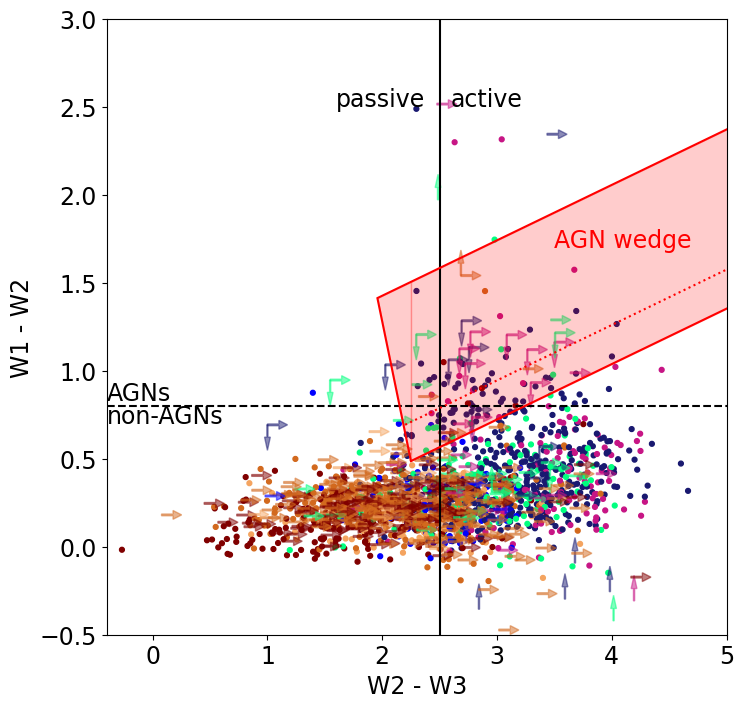

In [161]:
fig = plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 17
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17 

plt.scatter(db_det['w2'] - db_det['w3'], db_det['w1'] - db_det['w2'], c=[colors_WHAN[item] for item in db_det['WHAN']], marker='o', s=12)

size_x = 0.1
size_y = 0.07
width=0.01
alpha = 0.5

db_w1.reset_index(inplace=True, drop=True)
for i in range(len(db_w1)):
    plt.arrow(db_w1['w2'][i] - db_w1['w3'][i], db_w1['w1'][i] - db_w1['w2'][i], 0, size_y, color=colors_WHAN[db_w1['WHAN'][i]], width=0.01, head_width=5*width, alpha=alpha)

db_w2.reset_index(inplace=True, drop=True)
for i in range(len(db_w2)):
    plt.arrow(db_w2['w2'][i] - db_w2['w3'][i], db_w2['w1'][i] - db_w2['w2'][i], size_x, 0, color=colors_WHAN[db_w2['WHAN'][i]], width=0.01, head_width=5*width, alpha=alpha)
    plt.arrow(db_w2['w2'][i] - db_w2['w3'][i], db_w2['w1'][i] - db_w2['w2'][i], 0, -1*size_y, color=colors_WHAN[db_w2['WHAN'][i]], width=0.01, head_width=5*width, alpha=alpha)

db_w3.reset_index(inplace=True, drop=True)
for i in range(len(db_w3)):
    plt.arrow(db_w3['w2'][i] - db_w3['w3'][i], db_w3['w1'][i] - db_w3['w2'][i], size_x, 0, color=colors_WHAN[db_w3['WHAN'][i]], width=0.01, head_width=5*width, alpha=alpha)

db_w1_w3.reset_index(inplace=True, drop=True)
for i in range(len(db_w1_w3)):
    plt.arrow(db_w1_w3['w2'][i] - db_w1_w3['w3'][i], db_w1_w3['w1'][i] - db_w1_w3['w2'][i], size_x, 0, color=colors_WHAN[db_w1_w3['WHAN'][i]], width=0.01, head_width=5*width, alpha=alpha)
    plt.arrow(db_w1_w3['w2'][i] - db_w1_w3['w3'][i], db_w1_w3['w1'][i] - db_w1_w3['w2'][i], 0, size_y, color=colors_WHAN[db_w1_w3['WHAN'][i]], width=0.01, head_width=5*width, alpha=alpha)

plt.xlabel('W2 - W3')
plt.axvline(2.5, color='black', linestyle='solid')

plt.ylabel('W1 - W2')
plt.axhline(0.8, color='black', linestyle='dashed')

x = np.arange(2.2, 5.1, 0.1)
x_up = np.arange(1.96, 5.1, 0.1)
x_down = np.arange(2.251, 5.1, 0.001)
x_bl = np.arange(1.96, 2.251, 0.001)

plt.text(2.6, 2.5, 'active')
plt.text(1.6, 2.5, 'passive')

plt.text(-0.4, 0.83, 'AGNs')
plt.text(-0.4, 0.7, 'non-AGNs')

plt.fill_between(x_bl, 0.315*x_bl + 0.796, -3.172*x_bl + 7.624, color='red', alpha=0.2)
plt.fill_between(x_down, 0.315*x_down + 0.796, 0.315*x_down -0.222, color='red', alpha=0.2)
plt.text(3.5, 1.7, 'AGN wedge', color='red')

plt.xlim(-0.4, 5)
plt.ylim(-0.5, 3)
plt.plot(x, 0.315*x, color='red', linestyle='dotted')
plt.plot(x_up, 0.315*x_up + 0.796, color='red', linestyle='solid')
plt.plot(x_down, 0.315*x_down -0.222, color='red', linestyle='solid')
plt.plot(x_bl, -3.172*x_bl + 7.624, color='red', linestyle='solid')

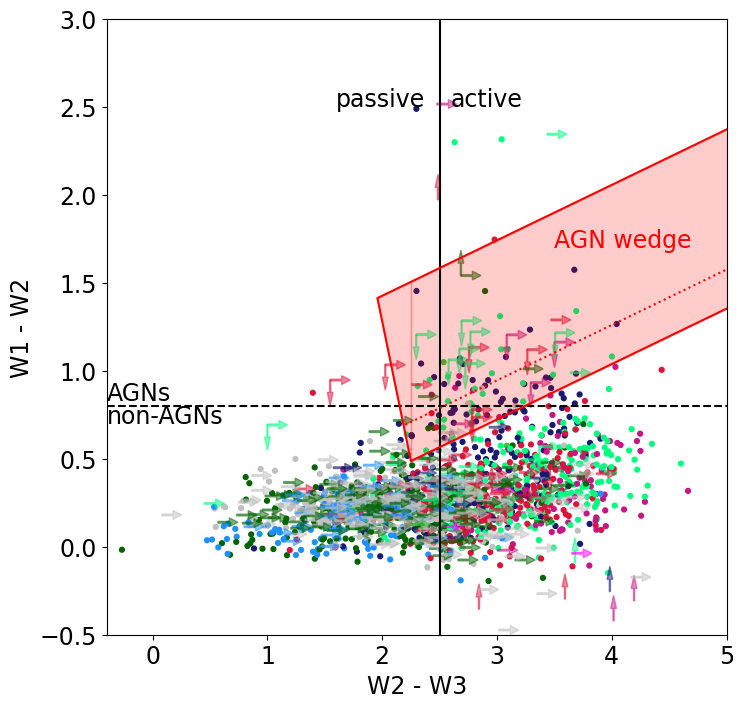

In [162]:
fig = plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 17
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17 

plt.scatter(db_det['w2'] - db_det['w3'], db_det['w1'] - db_det['w2'], c=[colors_BPT[item] for item in db_det['BPT']], marker='o', s=12)

size_x = 0.1
size_y = 0.07
width=0.01
alpha = 0.5

db_w1.reset_index(inplace=True, drop=True)
for i in range(len(db_w1)):
    plt.arrow(db_w1['w2'][i] - db_w1['w3'][i], db_w1['w1'][i] - db_w1['w2'][i], 0, size_y, color=colors_BPT[db_w1['BPT'][i]], width=0.01, head_width=5*width, alpha=alpha)

db_w2.reset_index(inplace=True, drop=True)
for i in range(len(db_w2)):
    plt.arrow(db_w2['w2'][i] - db_w2['w3'][i], db_w2['w1'][i] - db_w2['w2'][i], size_x, 0, color=colors_BPT[db_w2['BPT'][i]], width=0.01, head_width=5*width, alpha=alpha)
    plt.arrow(db_w2['w2'][i] - db_w2['w3'][i], db_w2['w1'][i] - db_w2['w2'][i], 0, -1*size_y, color=colors_BPT[db_w2['BPT'][i]], width=0.01, head_width=5*width, alpha=alpha)

db_w3.reset_index(inplace=True, drop=True)
for i in range(len(db_w3)):
    plt.arrow(db_w3['w2'][i] - db_w3['w3'][i], db_w3['w1'][i] - db_w3['w2'][i], size_x, 0, color=colors_BPT[db_w3['BPT'][i]], width=0.01, head_width=5*width, alpha=alpha)

db_w1_w3.reset_index(inplace=True, drop=True)
for i in range(len(db_w1_w3)):
    plt.arrow(db_w1_w3['w2'][i] - db_w1_w3['w3'][i], db_w1_w3['w1'][i] - db_w1_w3['w2'][i], size_x, 0, color=colors_BPT[db_w1_w3['BPT'][i]], width=0.01, head_width=5*width, alpha=alpha)
    plt.arrow(db_w1_w3['w2'][i] - db_w1_w3['w3'][i], db_w1_w3['w1'][i] - db_w1_w3['w2'][i], 0, size_y, color=colors_BPT[db_w1_w3['BPT'][i]], width=0.01, head_width=5*width, alpha=alpha)

plt.xlabel('W2 - W3')
plt.axvline(2.5, color='black', linestyle='solid')

plt.ylabel('W1 - W2')
plt.axhline(0.8, color='black', linestyle='dashed')

x = np.arange(2.2, 5.1, 0.1)
x_up = np.arange(1.96, 5.1, 0.1)
x_down = np.arange(2.251, 5.1, 0.001)
x_bl = np.arange(1.96, 2.251, 0.001)

plt.text(2.6, 2.5, 'active')
plt.text(1.6, 2.5, 'passive')

plt.text(-0.4, 0.83, 'AGNs')
plt.text(-0.4, 0.7, 'non-AGNs')

plt.fill_between(x_bl, 0.315*x_bl + 0.796, -3.172*x_bl + 7.624, color='red', alpha=0.2)
plt.fill_between(x_down, 0.315*x_down + 0.796, 0.315*x_down -0.222, color='red', alpha=0.2)
plt.text(3.5, 1.7, 'AGN wedge', color='red')

plt.xlim(-0.4, 5)
plt.ylim(-0.5, 3)
plt.plot(x, 0.315*x, color='red', linestyle='dotted')
plt.plot(x_up, 0.315*x_up + 0.796, color='red', linestyle='solid')
plt.plot(x_down, 0.315*x_down -0.222, color='red', linestyle='solid')
plt.plot(x_bl, -3.172*x_bl + 7.624, color='red', linestyle='solid')